# Exercise 1.1
Load an image and compute the full SVD. 
- A.  Choose a rank $r<m$ and confirm that the matirx $U^*U$ is the $r\times r$ identity matrix
- B. Confirm that $UU^*$ is *not* the identity matrix
- C. Compute the norm of the error between $UU^*$ and the $n\times n$ identity matrix as the rank $r$ varies from $1$ to $n$ and plot the error.


### Load an image and compute the full SVD

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from IPython.display import display, Latex, Math

# Load the image
A = imread('/workspaces/scribing/images/logo.png')
X = np.mean(A, -1)  # Convert to grayscale

# Take the SVD
U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

### Part A
Choose a rank $r<m$ and confirm that the matrix $U^*U$ is the $r\times r$ identity matrix.

In [95]:
# Choose a rank r (must be less than m)
num_rows, num_cols = U_r.shape
print('m: ', num_rows, '\n')
print('n: ', num_cols, '\n')

r = 27;  # Rank of the approximation (any r < m)

# Truncated U (only the first r columns)
U_r = U[:, :r]

# Compute U_r^dagger * U_r (here U_r^dagger denotes the conjuage transpose; for real data, this is just the transpose)
I_r = np.dot(U_r.T, U_r)

# Numerical confirmation
identity_matrix = np.eye(r)
difference = I_r - identity_matrix
#
# Compute the norm of the difference
error_norm = np.linalg.norm(difference)
print('Norm of the distance (should be near 0): ', error_norm, '\n')


m:  450 

n:  450 

Norm of the distance (should be near 0):  1.0064210607239148e-06 



#### Part A Answer

In [77]:
if error_norm < 1e-5:
    display(Latex(r"$U_r^\dagger U_r \approx I_r$ ✅"))
else:
    display(Latex(r"$U_r^\dagger U_r \neq I_r$ ❌"))

<IPython.core.display.Latex object>

### Part B
Confirm that the matrix $UU^\dagger$ is not the  $r\times r$ identity matrix.

In [78]:
# Choose a rank r (must be less than m)
num_rows, num_cols = U_r.shape
print('m: ', num_rows, '\n')
print('n: ', num_cols, '\n')

r = 27;  # Rank of the approximation (any r < m)

# Truncated U (only the first r columns)
U_r = U[:, :r]

# Compute U_r^dagger * U_r (here U_r^dagger denotes the conjuage transpose; for real data, this is just the transpose)
notI_r = np.dot(U_r, U_r.T)

# Numerical confirmation
identity_matrix = np.eye(num_rows)
difference = notI_r - identity_matrix
#
# Compute the norm of the difference
error_norm = np.linalg.norm(difference)
print('Norm of the distance (should be near 0): ', error_norm, '\n')

m:  450 

n:  27 

Norm of the distance (should be near 0):  20.56696380443393 



#### Part B Answer

In [79]:
if error_norm < 1e-5:
    display(Latex(r"$U_rU_r^\dagger \approx I_r$ ✅"))
else:
    display(Latex(r"$U_rU_r^\dagger \neq I_r$ ❌"))

<IPython.core.display.Latex object>

### Part C
Compute the norm of the error between $UU^\dagger$ and the $n\times n$ identity matrix as the rank $r$ varies from $1$ to $n$ and plot the error.

In [85]:
# Compute the projection matrix P = U_r U_r^T
P = np.dot(U_r, U_r.T)

# Compare P to the mxm identity marix 
m = num_rows
I_m = np.eye(m)
error_B = np.linalg.norm(P - I_m)
display(Latex(r"Error in $P-I_m$: " + str(error_B) + " (should be greater than 0)"))

<IPython.core.display.Latex object>

In [86]:
if error_norm < 1e-5:
    display(Latex(r"$U_rU_r^\dagger \approx I_r$ ✅"))
else:
    display(Latex(r"$U_rU_r^\dagger \neq I_m$ ❌"))

<IPython.core.display.Latex object>

#### Plotting the Norm of the Error between $U_r U_r^\dagger$ and $I$ as $r$ Varies

$$\text{error}(r) = \Vert U_r U_r^\dagger - I_m \Vert_{(F)}$$

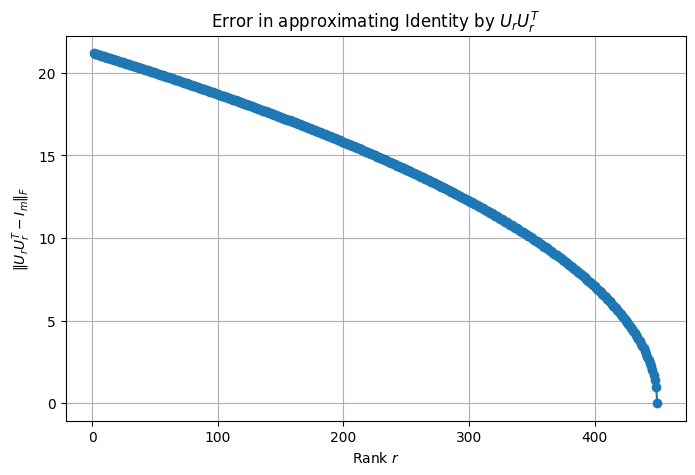

In [ ]:
errors = []
r_vals = range(1, m+1) # or you might restrict to a max rank if m is large

for r in r_vals:
    U_r = U[:, :r] # first r columns
    P_r = np.dot(U_r, U_r.T) # projection onto the subspace\
    err = np.linalg.norm(P_r - I_m) # Frobenius norm
    errors.append(err)

# Plotting the error versus rank r
plt.figure(figsize=(8, 5))
plt.plot(r_vals, errors, marker='o')
plt.xlabel(r"Rank $r$")
plt.ylabel(r"$\Vert U_rU_r^T - I_m \Vert_F$")
plt.title(r"Error in approximating Identity by $U_r U_r^T$")
plt.grid(True)
plt.show()

Note that the error decreases to near zero as $r# increases towards $m$. 